In [ ]:
#alle packages die ich verwenden werde, hat chatgpt gesagt

from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import numpy as np
from uncertainties.umath import *
import pandas as pd
from uncertainties.umath import sin, radians #achtung in bogenmaß eingeben
from IPython.display import display, Latex

# Brechung, Dispersion und Spektroskopie

## Disperionskurve eines optischen Glases

### Winkel der minimalen Ablenkung

text zur beschreibung

In [ ]:
# 1.2.1 winkel der minimalen ablenkung mit dem goniometer

# ableseunsicherheit
au = 1/(60) # eine winkelminute

# 1. prismawinkel, ohne unsicherheit angenommen
alpha_deg = 60.0 # in grad


# 2. unabgelenkter winkel phi_1
phi_1 = ufloat(120.0, au) # wert und unsicherheit

# 3. abgelenkte winkel phi_2
phi_2 = unp.uarray([160, 165, 170, 180, 185], au)

# achtung auf angabe der winkel, in min??? 

# minimale ablenkung
delta_min = [phi - phi_1 for phi in phi_2]

# berechnung des brechungsindex
def brechungsindex(alpha_deg, delta):
    alpha_rad = np.radians(alpha_deg) # konstanter wert
    delta_rad = radians(delta)

    n = sin((alpha_rad + delta_rad)/2) / sin(alpha_rad / 2)
    return n

n_values = [brechungsindex(alpha_deg, delta) for delta in delta_min]

n_neu = unp.uarray(unp.nominal_values(n_values), 0.1) #gibt uns n mit angepasster (nicht berechneter) unsicherheit, weil die berechneten so klein sind, argumentiere mit ableseunsicherheit


# darstellung als tabelle (kein plan was abgeht)
data = []
for i, (delta, n) in enumerate(zip(delta_min, n_neu), start=1):
    data.append({
        "Spektrallinie": i, #hier kann man auch eine liste mit farben machen, achtung auf die reihenfolge!! und achtung auf das i, das machts glaub ich kaputt
        "δ_min [°]": f"{delta.n:.2f} ± {delta.s:.2f}",
        "n": f"{n.n:.2f} ± {n.s:.2f}" # die zahlen vor f sagen, wie viele nachkommastellen angezeigt werden
    })

# pandas dataframe erstellen
df = pd.DataFrame(data)

# tabelle anzeigen
display(df)


,Spektrallinie,δ_min [°],n
0,1,40.00 ± 0.02,1.53209 ± 0.10000
1,2,45.00 ± 0.02,1.58671 ± 0.10000
2,3,50.00 ± 0.02,1.63830 ± 0.10000
3,4,60.00 ± 0.02,1.73205 ± 0.10000
4,5,65.00 ± 0.02,1.77402 ± 0.10000


### Spektrum einer Quecksilberlampe

Mit dem Programm OceanView kann mithilfe eines Gitterspektrometers das Spektrum einer Quecksilberlampe aufgezeichnet sowie die Wellenlängen der Emissionslinien ermittelt werden.

.
.
.
.
.
.
.
.
.
.
Abbildung 1: Ergebnisse in OceanView

In [25]:
#tabelle zur manuellen eintragung der wellenlängen
lambda_nm = np.array([404, 405, 406, 407, 408]) #wellenlängen in nm

farben = ["rot", "blau", "grün", "gelb", "violett"]

wavelength_data = {
    "Spektrallinie": farben, #achtung auf die reihenfolge!!
    "λ [nm]": lambda_nm
}
df_lambda = pd.DataFrame(wavelength_data)

#tabelle anzeigen
print("\nWellenlängen, bestimmt mit OceanView")
display(df_lambda)



Wellenlängen, bestimmt mit OceanView


,Spektrallinie,λ [nm]
0,rot,404
1,blau,405
2,grün,406
3,gelb,407
4,violett,408


### Dispersionskurve des Prismas
 
 

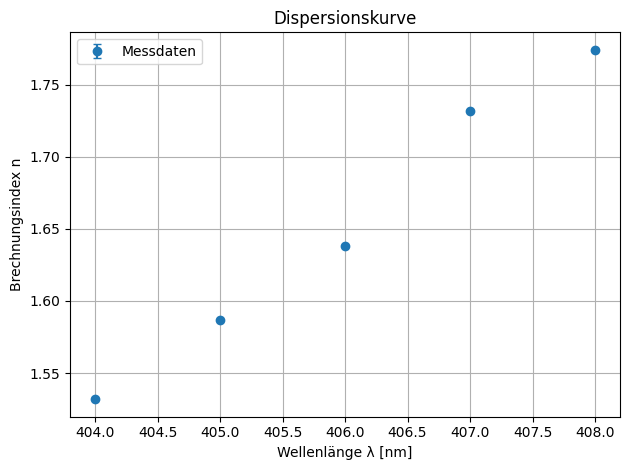

In [20]:
# tabelle brechungsindizes gegen wellenlänge

#für den plot mit fehlerbalken: unsicherheiten extrahieren
n_vals = unp.nominal_values(n_values)
n_errs = unp.std_devs(n_values)

#plot erstellen
plt.errorbar(lambda_nm, n_vals, yerr=n_errs, fmt='o', capsize=3, label="Messdaten") #x-achse, y-achse, vertikale fehlerbalken, punkte als marker, größe der balkenenden, legendenname
plt.xlabel("Wellenlänge λ [nm]")
plt.ylabel("Brechnungsindex n")
plt.title("Dispersionskurve")
plt.grid(True) #rasterlinien anzeigen
plt.legend() #legende anzeigen
plt.tight_layout() #automatischer abstand
plt.show() #plot anzeigen


Nach dem Vergleich mit Literaturwerten lässt sich feststellen, dass das Prisma aus Borsilikat/Flintglas ist. 
(text warum, bzw quelle zitieren)

## Absorptions-Spektroskopie

Unsicherheiten der Wellenlänge abschätzen!!

### Absorptionsspektrum und Absorptionsmaxima einer unbekannten Flüssigkeit

.
.
.
.
.
.
.
.
.

Abbildung 2: Ergebnis aus OceanView

### Vergleich mit Literaturwerten

Bei dieser Probe handelt es sich um Neodym/Praseodym. 


In [21]:
#vergleichstabelle

#neodym absorptionsmaxima
neodym_data = {
    "Farbe": ["grün", "grün", "gelb", "dunkelrot", "infrarot", "infrarot"],
    "λ [nm]": [510, 522, 578, 740, 799, 868]
}
df_neodym = pd.DataFrame(neodym_data)

#praseodym absorptionsmaxima
praseodym_data = {
    "Farbe": ["blau", "türkisblau", "türkis", "gelborange"],
    "λ [nm]": [444, 468, 481, 590]
}
df_praseodym = pd.DataFrame(praseodym_data)

#referenztabelle auswählen
df_literatur = df_neodym #sonst ändern

messwerte_von_oceanview = np.array([508, 523, 577, 739, 800, 870]) #gleiche länge wie referenztabelle oviously

#umwandeln in arrays
literaturwerte = df_literatur["λ [nm]"]

differenz = messwerte_von_oceanview - literaturwerte

#vergleichstabelle
vergleich_tabelle = pd.DataFrame({
    "Farbe": df_literatur["Farbe"],
    "λ Neodym [nm]": literaturwerte, #achtung hier auch wort neodym ändern wenns is
    "λ gemessen [nm]": messwerte_von_oceanview,
    "Abweichung [nm]": differenz
})

display(vergleich_tabelle)


,Farbe,λ Neodym [nm],λ gemessen [nm],Abweichung [nm]
0,grün,510,508,-2
1,grün,522,523,1
2,gelb,578,577,-1
3,dunkelrot,740,739,-1
4,infrarot,799,800,1
5,infrarot,868,870,2
